## 손실 곡선
fit() 메서드로 모델을 훈련할 때 출력의 마지막에 다음과 같은 메시지가 나왔다

<tensorflow.python.keras.callbacks.History at 0x8f824ad9f080>

주피터 노트북의 코드 셀은 마지막 라인의 실행 결과를 자동으로 출력한다. 즉 fit() 메서드가 무엇인가를 반환한다는 의미다. fit() 메서드는 History 클래스 객체를 반환하는데, 이 객체에는 훈련 과정에서 계산한 지표, 다시 말해 손실과 정확도 값이 저장되어있다. 이 값을 사용해서 그래프를 그려보자

In [1]:
# 패션 MNIST 데이터 적재 및 훈련셋 검증셋 나누기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

# 모델을 만드는 함수
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

# model_fn 모델 구조
model = model_fn()
model.summary()

4431872/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

여기에서 verbose는 훈련 과정 출력을 조절한다. 기본값은 1로 에폭마다 진행 막대와 함께 손실 등의 지표가 출력된다. 2로 바꾸면 진행 막대를 빼고 출력된다. 이번에는 훈련 결과를 그래프로 나타내고 verbose를 0으로 지정하여 훈련 과정을 나타내지 않았다

In [4]:
# history 딕셔너리 속성값 확인
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


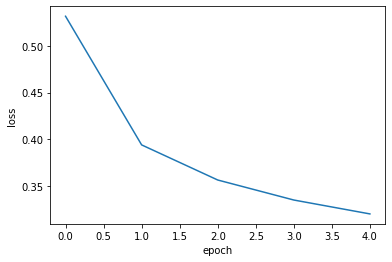

In [5]:
# 그래프 - loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

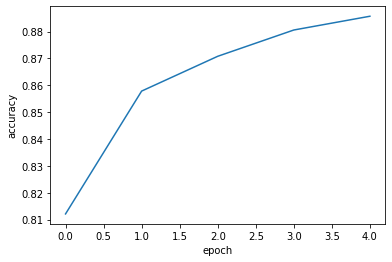

In [6]:
# 그래프 - accuracy
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

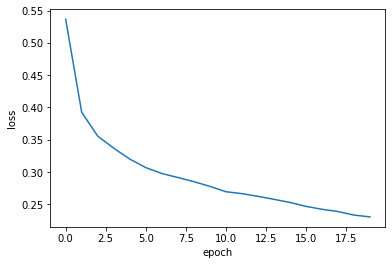

In [8]:
# 모델 훈련 - 20 에폭 돌리기
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


## 검증 손실
에폭에 따른 오버 언더피팅을 파악하려면 훈련셋에 대한 점수뿐만 아니라 검증셋에 대한 점수도 필요하다. 손실에 대한 두 점수를 견주었을 때 훈련셋과 검증셋의 점수의 차가 커질 때 오버피팅이라고 생각할 수 있기 때문이다. 이 장에서는 손실을 사용해 오버/언더피팅을 다뤄본다
> 참고
- 인공 신경망이 모델을 최적화하는 대상은 정확도가 아닌 손실함수다. 따라서 모델이 잘 훈련되었는지 판단하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 낫다

In [9]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [10]:
# history의 딕셔너리 값 확인
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


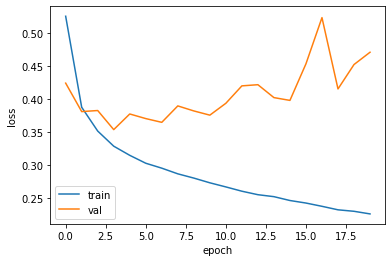

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

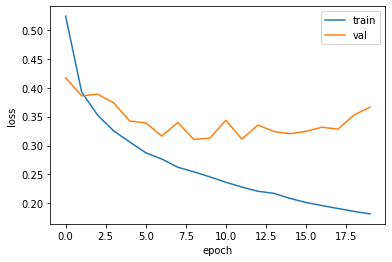

In [12]:
# optimizer를 adam으로 바꾸어 훈련
model=model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()